In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sklearn

In [2]:
import GuestbookDbConnect as gdb
import ReportTimerange as rtr

In [3]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd

conn = gdb.guestbookDbConnect()
print(conn)

Welcome to Jupyter Notebook.  You are connected to the Opportunity House guestbook database!
<connection object at 0x7f7e86126178; dsn: 'user=gbuser password=xxx dbname=guestbookdb host=localhost port=5432', closed: 0>


In [4]:
trange = rtr.timerange("SI")
print(trange)

query = "SELECT idperson, gender_id, ethnicity_id, veteran_id, credits \
         FROM guestbook_personsnapshot \
         JOIN guestbook_person ON idperson=person_id \
         WHERE timestamp BETWEEN '{}' AND '{}' \
         GROUP BY idperson \
         ORDER BY idperson asc".format(trange[0], trange[1])

print(query)

persons = pd.read_sql(query, conn)
persons.head(10)

[datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2020, 1, 2, 17, 0, 54, 267862), 'MM/YYYY']
SELECT idperson, gender_id, ethnicity_id, veteran_id, credits          FROM guestbook_personsnapshot          JOIN guestbook_person ON idperson=person_id          WHERE timestamp BETWEEN '2018-01-01 00:00:00' AND '2020-01-02 17:00:54.267862'          GROUP BY idperson          ORDER BY idperson asc


,idperson,gender_id,ethnicity_id,veteran_id,credits
0,17,1,6,1,29
1,18,1,1,1,10
2,19,2,6,3,34
3,20,1,1,1,10
4,21,2,6,3,7
5,22,1,3,1,8
6,23,3,6,3,14
7,24,1,1,1,2
8,25,3,6,3,1
9,26,1,1,1,26


In [5]:
query = "SELECT idperson, \
         COUNT(idsnapshot) AS visits \
         FROM guestbook_personsnapshot \
         JOIN guestbook_person ON idperson=person_id \
         WHERE timestamp BETWEEN '{}' AND '{}' \
         GROUP BY idperson \
         ORDER BY idperson asc".format(trange[0], trange[1])

print(query)

visits = pd.read_sql(query, conn)
visits.head(10)

SELECT idperson,          COUNT(idsnapshot) AS visits          FROM guestbook_personsnapshot          JOIN guestbook_person ON idperson=person_id          WHERE timestamp BETWEEN '2018-01-01 00:00:00' AND '2020-01-02 17:00:54.267862'          GROUP BY idperson          ORDER BY idperson asc


,idperson,visits
0,17,31
1,18,12
2,19,72
3,20,1
4,21,96
5,22,27
6,23,118
7,24,216
8,25,145
9,26,69


In [6]:
query = "SELECT idperson, \
         COUNT(idservice) AS services \
         FROM guestbook_personsnapshot \
         JOIN guestbook_person ON idperson=person_id \
         JOIN guestbook_personservicerequest ON connection_id=idsnapshot \
         WHERE timestamp BETWEEN '{}' AND '{}' \
         GROUP BY idperson \
         ORDER BY idperson asc".format(trange[0], trange[1])

print(query)

services = pd.read_sql(query, conn)
services.head(10)

#data = services.set_index('idperson').join(persons.set_index('idperson'))
#data.head(1000)

SELECT idperson,          COUNT(idservice) AS services          FROM guestbook_personsnapshot          JOIN guestbook_person ON idperson=person_id          JOIN guestbook_personservicerequest ON connection_id=idsnapshot          WHERE timestamp BETWEEN '2018-01-01 00:00:00' AND '2020-01-02 17:00:54.267862'          GROUP BY idperson          ORDER BY idperson asc


,idperson,services
0,17,23
1,18,11
2,19,147
3,20,2
4,21,208
5,22,38
6,23,313
7,24,320
8,25,299
9,26,141


In [7]:
labels    = ["NA", "Unknown", "Stable", "Unstable", "Sheltered", "Unsheltered", "Jail"]
objectids = [0,    1,         2,        3,          4,           5,             6]

query = "SELECT idperson, \
         count(1) filter (where prompt_id=8 AND object_id=1) AS unknown, \
         count(1) filter (where prompt_id=8 AND object_id=2) AS stable, \
         count(1) filter (where prompt_id=8 AND object_id=3) AS unstable, \
         count(1) filter (where prompt_id=8 AND object_id=4) AS sheltered, \
         count(1) filter (where prompt_id=8 AND object_id=5) AS unsheltered, \
         count(1) filter (where prompt_id=8 AND object_id=6) AS jail \
         FROM guestbook_personsnapshot \
         JOIN guestbook_person ON idperson=person_id \
         JOIN guestbook_personsurvey ON connection_id=idsnapshot \
         WHERE timestamp BETWEEN '{}' AND '{}' \
         GROUP BY idperson \
         ".format(trange[0], trange[1])

housing = pd.read_sql(query, conn)
housing.head(100)


,idperson,unknown,stable,unstable,sheltered,unsheltered,jail
0,1074,0,0,0,1,10,0
1,264,0,0,0,0,11,0
2,887,0,0,0,0,3,0
3,802,0,0,0,0,1,0
4,1070,0,0,1,0,0,0
5,1080,0,0,0,0,1,0
6,1209,0,0,0,0,2,0
7,496,0,3,0,0,0,0
8,630,0,0,0,26,0,0
9,1087,0,2,0,0,0,0


In [8]:
df_all_cols = visits.set_index('idperson').join(persons.set_index('idperson')).join(services.set_index('idperson')).join(housing.set_index('idperson')).fillna(0)
df_all_cols.head(1000)

,visits,gender_id,ethnicity_id,veteran_id,credits,services,unknown,stable,unstable,sheltered,unsheltered,jail
idperson,,,,,,,,,,,,
17,31,1,6,1,29,23.0,0.0,4.0,1.0,0.0,0.0,0.0
18,12,1,1,1,10,11.0,0.0,4.0,0.0,0.0,1.0,0.0
19,72,2,6,3,34,147.0,0.0,0.0,2.0,1.0,38.0,0.0
20,1,1,1,1,10,2.0,0.0,0.0,0.0,0.0,0.0,0.0
21,96,2,6,3,7,208.0,0.0,0.0,0.0,1.0,59.0,1.0
22,27,1,3,1,8,38.0,0.0,3.0,0.0,1.0,2.0,0.0
23,118,3,6,3,14,313.0,0.0,8.0,63.0,8.0,25.0,0.0
24,216,1,1,1,2,320.0,0.0,58.0,2.0,2.0,0.0,0.0
25,145,3,6,3,1,299.0,0.0,29.0,2.0,2.0,56.0,0.0


In [9]:
df_all_cols['genderrate'] = df_all_cols['gender_id']/df_all_cols['gender_id'].max()
df_all_cols['ethnicityrate'] = df_all_cols['ethnicity_id']/df_all_cols['gender_id'].max()
df_all_cols['veteranrate'] = df_all_cols['veteran_id']/df_all_cols['gender_id'].max()
df_all_cols['servicerate'] = df_all_cols['services']/df_all_cols['visits']
df_all_cols['creditrate'] = df_all_cols['credits']/df_all_cols['visits']
df_all_cols['unknownrate'] = df_all_cols['unknown']/df_all_cols['visits']
df_all_cols['stablerate'] = df_all_cols['stable']/df_all_cols['visits']
df_all_cols['unstablerate'] = df_all_cols['unstable']/df_all_cols['visits']
df_all_cols['shelteredrate'] = df_all_cols['sheltered']/df_all_cols['visits']
df_all_cols['unshelteredrate'] = df_all_cols['unsheltered']/df_all_cols['visits']
df_all_cols['jailrate'] = df_all_cols['jail']/df_all_cols['visits']
df_all_cols = df_all_cols.drop(['visits', 'services', 'gender_id', 'ethnicity_id', 'veteran_id', 'credits', 'unknown', 'stable', 'unstable', 'sheltered', 'unsheltered', 'jail'], axis=1)
df_all_cols.head(1000)

,genderrate,ethnicityrate,veteranrate,servicerate,creditrate,unknownrate,stablerate,unstablerate,shelteredrate,unshelteredrate,jailrate
idperson,,,,,,,,,,,
17,0.333333,2.000000,0.333333,0.741935,0.935484,0.0,0.129032,0.032258,0.000000,0.000000,0.000000
18,0.333333,0.333333,0.333333,0.916667,0.833333,0.0,0.333333,0.000000,0.000000,0.083333,0.000000
19,0.666667,2.000000,1.000000,2.041667,0.472222,0.0,0.000000,0.027778,0.013889,0.527778,0.000000
20,0.333333,0.333333,0.333333,2.000000,10.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
21,0.666667,2.000000,1.000000,2.166667,0.072917,0.0,0.000000,0.000000,0.010417,0.614583,0.010417
22,0.333333,1.000000,0.333333,1.407407,0.296296,0.0,0.111111,0.000000,0.037037,0.074074,0.000000
23,1.000000,2.000000,1.000000,2.652542,0.118644,0.0,0.067797,0.533898,0.067797,0.211864,0.000000
24,0.333333,0.333333,0.333333,1.481481,0.009259,0.0,0.268519,0.009259,0.009259,0.000000,0.000000
25,1.000000,2.000000,1.000000,2.062069,0.006897,0.0,0.200000,0.013793,0.013793,0.386207,0.000000


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

[[5.80717489e-01 1.08968610e+00 6.32286996e-01 1.79857899e+00
  9.72519353e-01 0.00000000e+00 1.69615177e-01 1.02388148e-01
  1.66508111e-01 2.28093965e-01 4.98852671e-03]
 [3.33333333e-01 3.52044352e-01 3.33333333e-01 1.64851005e+00
  9.82744283e+00 0.00000000e+00 2.70616771e-01 1.73596674e-01
  6.86070686e-02 1.76368676e-01 2.80665281e-02]
 [3.93419170e-01 7.45350501e-01 3.64806867e-01 1.83716455e+00
  4.37524237e+00 0.00000000e+00 1.93584634e-01 1.37677451e-01
  1.35085837e-01 1.78595796e-01 1.28755365e-02]]


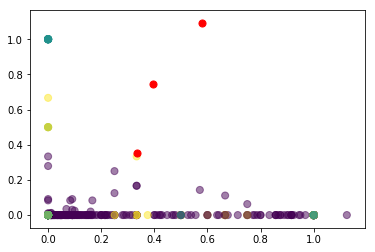

In [15]:
df = df_all_cols

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)


plt.scatter(df['shelteredrate'], df['jailrate'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)